In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [6]:
df.info()
#take a look at the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
#no object variables - yay!
df.head()
#take another look at the data frame

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.columns
#take a look at the unique columns in the df

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [14]:
df = df.rename(columns={'default.payment.next.month': 'IS_DEFAULT', 
                        'PAY_0': 'PAY_1'})
#rename some variables to make more sense

In [8]:
for col in df.columns:
    print(col, df[col].nunique())
#look at unique values in each column

ID 30000
LIMIT_BAL 81
SEX 2
EDUCATION 7
MARRIAGE 4
AGE 56
PAY_0 11
PAY_2 11
PAY_3 11
PAY_4 11
PAY_5 10
PAY_6 10
BILL_AMT1 22723
BILL_AMT2 22346
BILL_AMT3 22026
BILL_AMT4 21548
BILL_AMT5 21010
BILL_AMT6 20604
PAY_AMT1 7943
PAY_AMT2 7899
PAY_AMT3 7518
PAY_AMT4 6937
PAY_AMT5 6897
PAY_AMT6 6939
default.payment.next.month 2


In [9]:
#we'll need to figure out why there are 4 unique variables for marriage later
df.isnull().sum()
#check for null variables in each column

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [11]:
#nothing fishy there!
df.loc[df.EDUCATION >= 4, 'EDUCATION'] = 0
df.loc[df.MARRIAGE == 3, 'MARRIAGE'] = 0
#since marriage and education both have some redundant variables (multiple iterations of 'other') we can combine them

[Text(0, 0, 'No Default'), Text(1, 0, 'Default')]

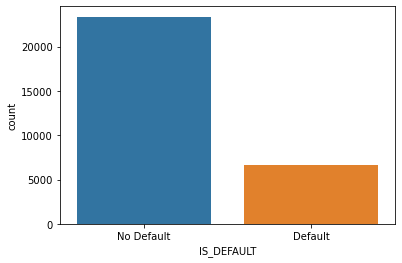

In [15]:
#are there more defaulters or non-defaulters?
fig = sns.countplot(x = 'IS_DEFAULT', data = df)
fig.set_xticklabels(["No Default", "Default"])

Text(0, 0.5, 'Percentage')

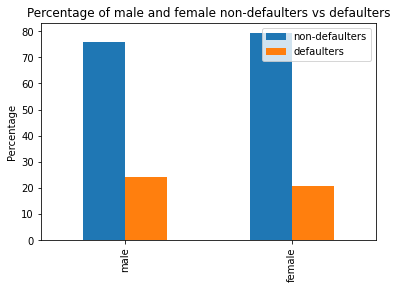

In [18]:
#there are definitely more non-defaulters than there are defaulters - this tells us the majority of credit card users in this df didn't default in the time frame this data was taken from
#do men default more than women?
number_of_male_card_holders = (df.SEX == 1).sum() #11,888
number_of_female_card_holders = (df.SEX == 2).sum() #18,112

number_of_male_defaulters = (df[df.SEX == 1].IS_DEFAULT == 1).sum() #2,873
number_of_female_defaulters = (df[df.SEX == 2].IS_DEFAULT == 1).sum() #3,763

percentage_of_male_def = round((number_of_male_defaulters/number_of_male_card_holders) * 100,2) #24.17%
percentage_of_female_def = round((number_of_female_defaulters/number_of_female_card_holders) * 100,2) #20.78%
temp_df = pd.DataFrame({"non-defaulters":{"male":100 - percentage_of_male_def, "female":100 - percentage_of_female_def},"defaulters":{"male":percentage_of_male_def, "female":percentage_of_female_def}})

fig = temp_df.plot(kind = 'bar')
fig.set_title("Percentage of male and female non-defaulters vs defaulters")
fig.set_ylabel("Percentage")

Text(0, 0.5, 'Percentage')

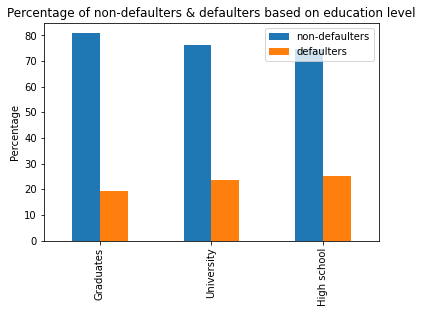

In [22]:
#men defaulted more than women, but only slightly. No significant findings here.
#lets see how defaulters and non-defaulters compare in education groups (we dropped the unknown variable here, because it doesn't provide any real insight)
number_of_grad_edu_card_holders = (df.EDUCATION == 1).sum() #10,585
number_of_uni_card_holders = (df.EDUCATION == 2).sum() #14,030
number_of_high_school_card_holders = (df.EDUCATION == 3).sum() #4,917

number_of_grad_defaulters = (df[(df.EDUCATION == 1)].IS_DEFAULT == 1).sum() #2036
number_of_uni_defaulters = (df[(df.EDUCATION == 2)].IS_DEFAULT == 1).sum() #3330
number_of_high_school_defaulters = (df[(df.EDUCATION == 3)].IS_DEFAULT == 1).sum() #1237

percentage_of_grad_def = round((number_of_grad_defaulters/number_of_grad_edu_card_holders) * 100,2) #19.23
percentage_of_uni_def = round((number_of_uni_defaulters/number_of_uni_card_holders) * 100,2) #23.73
percentage_of_high_school_def = round((number_of_high_school_defaulters/number_of_high_school_card_holders) * 100,2) #25.16
temp_df = pd.DataFrame({"non-defaulters":{"Graduates":100 - percentage_of_grad_def, "University":100 - percentage_of_uni_def, "High school":100 - percentage_of_high_school_def},"defaulters":{"Graduates": percentage_of_grad_def, "University": percentage_of_uni_def, "High school":percentage_of_high_school_def}})

fig = temp_df.plot(kind = 'bar')
fig.set_title("Percentage of non-defaulters & defaulters based on education level")
fig.set_ylabel("Percentage")

Text(0.5, 0, 'Percentage')

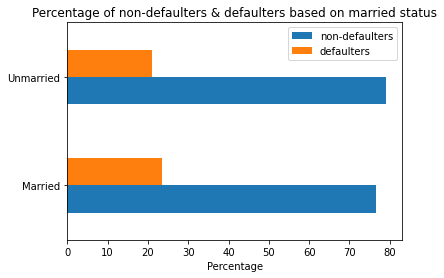

In [25]:
#in this sample, individuals with more education defaulted less on average
#now let's look at how defaulters and non-defaulters vary based on marital status (again dropping the 'others' here)
number_of_married_card_holders = (df.MARRIAGE == 1).sum() #13,659
number_of_unmarried_card_holders = (df.MARRIAGE == 2).sum() #15,964

number_of_married_def = (df[(df.MARRIAGE == 1)].IS_DEFAULT == 1).sum() #3,206
number_of_ummarried_def = (df[(df.MARRIAGE == 2)].IS_DEFAULT == 1).sum() #3,341

percentage_of_married_def = round(number_of_married_def/number_of_married_card_holders * 100,2) #23.47
percentage_of_ummarried_def = round(number_of_ummarried_def/number_of_unmarried_card_holders * 100,2) #20.93


temp_df = pd.DataFrame({"non-defaulters":{"Married":100 - percentage_of_married_def, "Unmarried":100 - percentage_of_ummarried_def},
                        "defaulters":{"Married":percentage_of_married_def, "Unmarried": percentage_of_ummarried_def}})
fig = temp_df.plot(kind = 'barh')
fig.set_title("Percentage of non-defaulters & defaulters based on married status")
fig.set_xlabel("Percentage")

Text(0.5, 1.0, 'Defaulters based on education level')

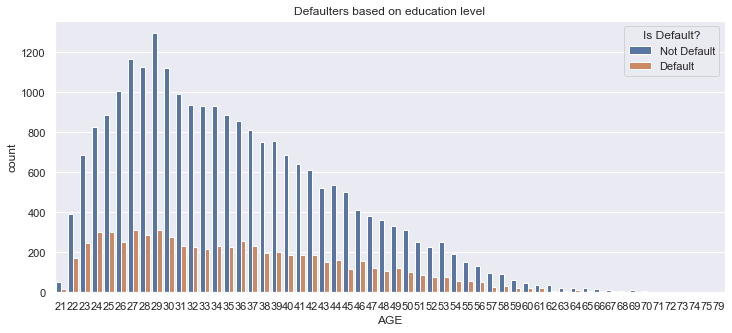

In [26]:
#in this sample, marital status didn't seem to make a difference when it came to defaulting
#how does the distribution vary based on age?
sns.set(rc={'figure.figsize':(12,5)})
fig = sns.countplot(x = 'AGE', data = df, hue = 'IS_DEFAULT')
fig.legend(title='Is Default?', loc='upper right', labels=["Not Default", "Default"])
fig.set_title("Defaulters based on education level")

<AxesSubplot:>

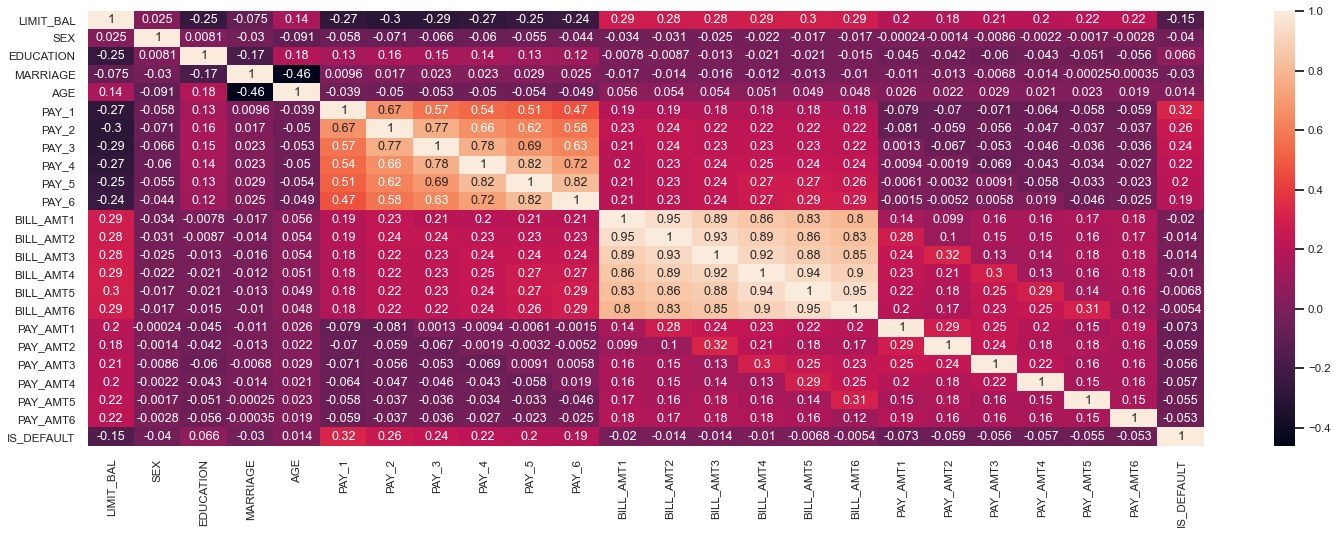

In [29]:
#we clearly have more data on individuals aged 22-40. It is unclear to tell if older people in this sample defaulted more or less than younger people.
#let's take a look at the correlation matrix for the df
sns.set(rc={'figure.figsize':(25,8)})
sns.set_context("talk", font_scale=0.7)
sns.heatmap(df.iloc[:,1:].corr(), annot=True)

In [30]:
#BILL_AMT and PAY do not seem to be correlated, which is interesting. The PAY and BILL_AMT variables are correlated with themselves, though, which is to be expected.